Comp 4980 Final Project: Solving Difficult Integrals by reframing them as Ordinary Differential Equations and Using Neural Networks

William Mwangi

T00622533

The ideas on how to code this are gotten from the following 2 articles

https://towardsdatascience.com/using-neural-networks-to-solve-ordinary-differential-equations-a7806de99cdd


https://towardsdatascience.com/how-to-solve-an-ode-with-a-neural-network-917d11918932

In [ ]:
import torch
from torch import nn
import numpy as np

In [ ]:
#Create tensors to hold input an output

x=torch.linspace(0, 10, 100)

f0=torch.tensor([1])

inf_s = np.sqrt(np.finfo(np.float32).eps)

x1= x.unsqueeze(-1)
y1=2*x1

In [ ]:
#model1
layers = []
layers.append(nn.Linear(1, 32))
layers.append(nn.Tanh())
layers.append(nn.Linear(32, 32))
layers.append(nn.Sigmoid())
layers.append(nn.Linear(32,16))
layers.append(nn.Sigmoid())
layers.append(nn.Linear(16,1))
layers.append(nn.LeakyReLU(negative_slope=0.1))

model1=nn.Sequential(*layers)

In [ ]:
#define loss
loss_fn = torch.nn.MSELoss(reduction='sum')

In [ ]:
def g(var):
    return 1+model1(var)

In [ ]:
#training the model
learning_rate=0.01
optimizer = torch.optim.Adam(model1.parameters(), lr=0.01)
epochs=10000

for epoch in range(epochs):
    
    output=g(x1)
    y_pred=(g(x1+inf_s)-output)/inf_s
    
    loss =loss_fn(y_pred,y1)

    if epoch % 100 == 99:
        print(epoch, loss.item())
     
    if (loss.item()<0.1):
        print("sufficiently accurate model obtained")
        break
    
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

99 12302.7568359375
199 11701.5234375
299 11566.2880859375
399 11309.568359375
499 11174.1865234375
599 11010.6064453125
699 10992.07421875
799 10851.2255859375
899 10778.24609375
999 13596.244140625
1099 13349.4267578125
1199 13314.203125
1299 13295.1767578125
1399 13277.58984375
1499 13257.8056640625
1599 13234.240234375
1699 13205.205078125
1799 13170.8603515625
1899 13130.5859375
1999 13081.125
2099 13020.94921875
2199 12941.3310546875
2299 12824.267578125
2399 12622.6220703125
2499 12221.8447265625
2599 11850.2080078125
2699 10750.2568359375
2799 8889.9931640625
2899 7675.52001953125
2999 11544.7548828125
3099 10694.62109375
3199 9670.3779296875
3299 8468.70703125
3399 7063.13134765625
3499 5447.57958984375
3599 4896.5302734375
3699 3895.875
3799 3687.233154296875
3899 3406.2783203125
3999 2895.6455078125
4099 2445.92578125
4199 2066.54931640625
4299 1791.1806640625
4399 1705.096923828125
4499 1376.666259765625
4599 1134.120361328125
4699 973.1773681640625
4799 953.4615478515625
4

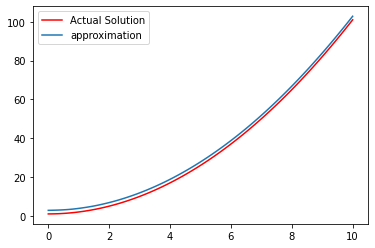

In [ ]:
import matplotlib.pyplot as plt

x=np.linspace(0,10,100)
approx=[]
f=model1(x1)
for i in range(100):
    p=f[i][0]
    approx.append(p.item())
y=x**2+1
plt.plot(x,y, "-r", label='Actual Solution')
plt.plot(x,approx, label="approximation")
plt.legend()
plt.show()

Now we solve a more difficult integral


$$\int\frac{1}{x^2-x+1}dx$$

In [ ]:
#Create input and output tensors

x=torch.linspace(-10,10,10000)
xx=x.unsqueeze(-1)
y=1/(x**2-x+1)
inf_s = np.sqrt(np.finfo(np.float32).eps)

In [ ]:
#my model
#model1
layers = []
layers.append(nn.Linear(1, 32))
layers.append(nn.Tanh())
layers.append(nn.Linear(32, 32))
layers.append(nn.Tanh())
layers.append(nn.Linear(32,16))
layers.append(nn.Sigmoid())
layers.append(nn.Linear(16,1))
layers.append(nn.LeakyReLU(negative_slope=0.1))

model2=nn.Sequential(*layers)

In [ ]:
#define g(x) a function that accounts for the intital conditions
def g(var):
    return model2(var)

In [ ]:
#training the model
learning_rate=0.01
optimizer = torch.optim.Adam(model2.parameters(), lr=0.01)
epochs=10000

for epoch in range(epochs):
    
    output=g(xx)
    y_pred=(g(xx+inf_s)-output)/inf_s
    
    loss =loss_fn(y_pred,y)

    if epoch % 100 == 99:
        print(epoch, loss.item())
     
    if (loss.item()<0.1):
        print("sufficiently accurate model obtained")
        break
    
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([10000])) that is different to the input size (torch.Size([10000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


99 9158456.0
199 9151343.0
299 9151051.0
399 9150971.0
499 9150941.0
599 9150927.0
699 9150918.0
799 9150913.0
899 9150909.0
999 9150907.0
1099 9150904.0
1199 9150902.0
1299 9150901.0
1399 9150899.0
1499 9150898.0
1599 9150897.0
1699 9150896.0
1799 9150895.0
1899 9150895.0
1999 9150894.0
2099 9150895.0
2199 9150894.0
2299 9150893.0
2399 9150894.0
2499 9150893.0
2599 9150893.0
2699 9150893.0
2799 9150892.0
2899 9150942.0
2999 9150896.0
3099 9150948.0
3199 9151048.0
3299 9151352.0
3399 9151404.0
3499 9151089.0
3599 9150911.0
3699 9150979.0
3799 9151166.0
3899 9150946.0
3999 9150914.0
4099 9150897.0
4199 9151872.0
4299 9151178.0
4399 9150912.0
4499 9151587.0
4599 9150902.0
4699 9151042.0
4799 9151482.0
4899 9150934.0
4999 9150934.0
5099 9150909.0


In [ ]:
#solve the integral analytically using scipy

import scipy 

from scipy.integrate import cumtrapz

In [ ]:
x=np.linspace(-10,10,10000)
dep_var=1/(x**2-x+1)
integral=cumtrapz(dep_var,x, initial=0)

In [ ]:
integral.size

In [ ]:
import matplotlib.pyplot as plt

approx=[]
f=model2(xx)
for i in range(10000):
    p=f[i][0]
    approx.append(p.item())

plt.plot(x,integral, "-r", label='Scipy Solution')
plt.plot(x,approx, label="NN solution")
plt.legend()
plt.show()

The Integral above has the following analytical solution which is rather difficult to compute. Calculation can be found at : https://xaktly.com/ToughIntegrals.html 

$$\frac{3 \sqrt{3}}{8} tan^{-1} \left( \frac{2}{\sqrt{3}} \left( x - \frac{1}{2} \right)\right) + C$$

Finally we Try a integral with no analytical solution

$$\int e^{-(sin(x)}dx$$

In [ ]:
x3=torch.linspace(-np.pi, np.pi, 1000)
x3=x3.unsqueeze(-1)

y3=torch.exp(-torch.sin(x3))

In [ ]:
#my model
#model1
layers = []
layers.append(nn.Linear(1, 32))
layers.append(nn.Tanh())
layers.append(nn.Linear(32, 32))
layers.append(nn.Sigmoid())
layers.append(nn.Linear(32,16))
layers.append(nn.Sigmoid())
layers.append(nn.Linear(16,1))
layers.append(nn.LeakyReLU(negative_slope=0.1))

model3=nn.Sequential(*layers)

In [ ]:
#define g(x) a function that accounts for the intital conditions
def g(var):
    return model3(var)

In [ ]:
#training the model
learning_rate=0.01
optimizer = torch.optim.Adam(model3.parameters(), lr=0.01)
epochs=10000

for epoch in range(epochs):
    
    output=g(x3)
    y_pred=(g(x3+inf_s)-output)/inf_s
    
    loss =loss_fn(y_pred,y3)

    if epoch % 100 == 99:
        print(epoch, loss.item())
     
    if (loss.item()<0.1):
        print("sufficiently accurate model obtained")
        break
    
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

In [ ]:
#solve using scipy

x=np.linspace(-np.pi,np.pi,1000)
dep_var=np.exp(-np.sin(x))
integral3=cumtrapz(dep_var,x, initial=0)

In [ ]:
import matplotlib.pyplot as plt

approx=[]
f=model3(x3)
for i in range(1000):
    p=f[i][0]
    approx.append(p.item())

plt.plot(x,integral3, "-r", label='Scipy Solution')
plt.plot(x,approx, label="NN solution")
plt.legend()
plt.show()